# Enigma - CDL Hackathon - Flight Graph Analysis





In [9]:
import networkx as nx
from collections import defaultdict
from dimod import BinaryQuadraticModel
from tabu import TabuSampler        
from dwave.system import DWaveSampler, EmbeddingComposite, LeapHybridSampler
import neal

import flightHelper



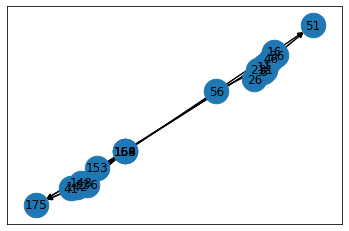

In [12]:

segments = []

def buildSet1():
    segments.append( Node(Segment(1, "101", "LCA", "ATH", 600, 695, 1, 1)))
    segments.append( Node(Segment(2, "102", "ATH", "LCA", 755, 845, 1, 1)))
    segments.append( Node(Segment(3, "103", "LCA", "ATH", 875, 970, 1, 1)))
    segments.append( Node(Segment(4, "104", "ATH", "LCA", 1035, 1125, 1, 1)))
def buildSet2():
    segments.append( Node(Segment(1, '2450', 'HOT', 'ELD', 425, 465, 1, 1)))
    segments.append( Node(Segment(6, '2450', 'ELD', 'IAH', 485, 595, 1, 1)))
    segments.append( Node(Segment(11, '2451', 'IAH', 'ELD', 625, 740, 1, 1)))
    segments.append( Node(Segment(16, '2451', 'ELD', 'HOT', 755, 795, 1, 1)))
    segments.append( Node(Segment(21, '2452', 'HOT', 'ELD', 850, 890, 1, 1)))
    segments.append( Node(Segment(26, '2452', 'ELD', 'IAH', 905, 1015, 1, 1)))
    segments.append( Node(Segment(31, '2453', 'IAH', 'ELD', 1050, 1160, 1, 1)))
    segments.append( Node(Segment(36, '2453', 'ELD', 'HOT', 1175, 1215, 1, 1)))
    segments.append( Node(Segment(41, '2454', 'HOT', 'MEM', 810, 890, 1, 1)))
    segments.append( Node(Segment(46, '2455', 'MEM', 'HOT', 750, 830, 1, 1)))
    segments.append( Node(Segment(51, '2456', 'HOT', 'MEM', 1230, 1310, 1, 1)))
    segments.append( Node(Segment(56, '2457', 'MEM', 'HOT', 330, 410, 1, 1)))
    segments.append( Node(Segment(136, '4125', 'MEM', 'HRO', 920, 1005, 1, 1)))
    segments.append( Node(Segment(142, '4126', 'HRO', 'MEM', 1030, 1110, 1, 1)))
    segments.append( Node(Segment(148, '4127', 'MEM', 'HRO', 500, 585, 1, 1)))
    segments.append( Node(Segment(153, '4128', 'HRO', 'MEM', 615, 695, 1, 1)))
    segments.append( Node(Segment(158, '4311', 'HRO', 'MEM', 390, 470, 1, 1)))
    segments.append( Node(Segment(164, '4311', 'HRO', 'MEM', 390, 470, 1, 1)))
    segments.append( Node(Segment(169, '4311', 'HRO', 'MEM', 390, 470, 1, 1)))
    segments.append( Node(Segment(175, '4316', 'MEM', 'HRO', 1135, 1220, 1, 1)))

def buildSet3():
    segments.append( Node(Segment(73, '3312', 'PDX', 'PDT', 420, 500, 1, 1)))
    segments.append( Node(Segment(78, '3314', 'PDX', 'PDT', 635, 715, 1, 1)))
    segments.append( Node(Segment(83, '3316', 'PDX', 'PDT', 920, 1000, 1, 1)))
    segments.append( Node(Segment(88, '3318', 'PDX', 'PDT', 1135, 1215, 1, 1)))
    segments.append( Node(Segment(97, '3318', 'PDX', 'PDT', 1135, 1215, 1, 1)))
    segments.append( Node(Segment(103, '3321', 'PDT', 'PDX', 315, 395, 1, 1)))
    segments.append( Node(Segment(108, '3323', 'PDT', 'PDX', 525, 605, 1, 1)))
    segments.append( Node(Segment(113, '3325', 'PDT', 'PDX', 740, 820, 1, 1)))
    segments.append( Node(Segment(118, '3327', 'PDT', 'PDX', 1025, 1105, 1, 1)))
    segments.append( Node(Segment(126, '3327', 'PDT', 'PDX', 1025, 1105, 1, 1)))


buildSet2()
G2 = nx.DiGraph()
for n1 in segments:
    for n2 in segments:
        if ( n1.id != n2.id ):
            # Prevent connections when gaps are 0 or negative
            cw = ConnectWeight(n1.obj,n2.obj)
            if ( cw.gap > 0 ):
                G2.add_weighted_edges_from([(n1.id,n2.id, cw.gap  )])
                
nx.draw_networkx(G2, node_size=600 , alpha=1)
